In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report


In [ ]:
# Generate the Dataset
X,y = make_classification(n_samples=1000, n_features=5,n_classes=2,random_state=42)

# convert Dataframe for checking
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(5)])
df['target'] = y
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  target
0  -0.439643   0.542547  -0.822420   0.401366  -0.854840       0
1   2.822231  -2.480859  -1.147691  -2.101131   3.040278       1
2   1.618386  -1.369478  -2.084113  -1.179659   1.613602       1
3   1.659048  -0.615202   1.112688  -0.835098  -0.272205       1
4   1.849824  -1.679456  -0.926698  -1.402509   2.123129       1


In [3]:
df.shape

(1000, 6)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#y_test = Actual y
#X_test = Actual X
# y_predict = Predicted y

In [ ]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
# Calculate the Confuision Matrix
cm = confusion_matrix(y_test, y_pred)
cm 
# Here, 119 = TN, 140 = TP, 27 =FP, 14 = FN 

array([[119,  27],
       [ 14, 140]])

Text(0.5, 1.0, 'Confuision Matrix Heatmap')

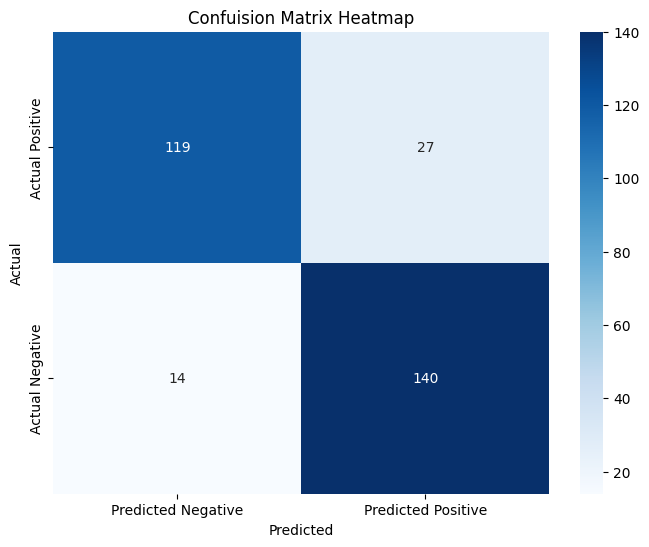

In [19]:
pt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels=['Actual Positive','Actual Negative'])
pt.xlabel('Predicted')
pt.ylabel('Actual')
pt.title("Confuision Matrix Heatmap")

In [23]:
# Split the confuisionn matrix into TP, FP, FN, TN
tn,fp,fn,tp = cm.ravel()
print(f"True Negative (TP):{tn} ")
print(f"False Positive (TP):{fp} ")
print(f"False Negative (TP):{fn} ")
print(f"True Positive (TP):{tp} ")

True Negative (TP):119 
False Positive (TP):27 
False Negative (TP):14 
True Positive (TP):140 


In [28]:
# Calculate various performance metrices
accu = accuracy_score(y_test,y_pred)
preci = precision_score(y_test,y_pred)
recal = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Accuracy : ",accu)
print("Precision : ",preci)
print("Recall : ",recal)
print("F1 : ",f1)

Accuracy :  0.8633333333333333
Precision :  0.8383233532934131
Recall :  0.9090909090909091
F1 :  0.8722741433021807


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       146
           1       0.84      0.91      0.87       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



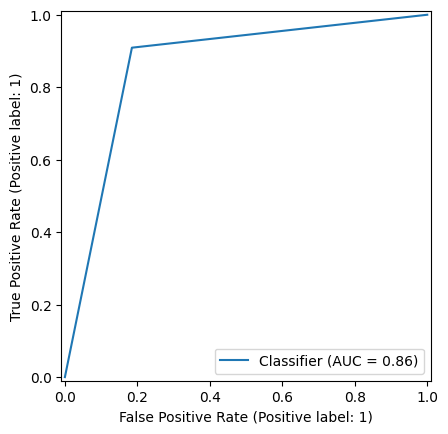

In [27]:
# Display ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred)

In [ ]:
i